# Benchmark conditional mean estimation methods

Benchmark methods that estimate conditonal means of the form $E[Y|X=x]$

In [34]:
using QuadraticTeamDecisionSolver, Distributions, Statistics, LinearAlgebra, IterativeSolvers,  LaTeXStrings, Plots

In [35]:
dpi = 1000;

In [67]:
saveTo = "/home/fe/michelena/Desktop/";

### Noise distribution

Synthetic stochastic process of the form:
$$Y_t = D(t) + X_t$$
We get realizations of the form:
$$Y_i = D(t_i) + X_{t_i} + \varepsilon_i$$

In [68]:
D = Normal(0,0.5)

Normal{Float64}(μ=0.0, σ=0.5)

In [69]:
truth(x) = sin(2*pi*x);
measurements(x) = truth(x) + rand(D);

In [70]:
X = range(start=-1, stop=1, length=100);
Y = measurements.(X);

We do regularized regression so we set:
$$ \lambda = 0.3 $$

In [71]:
λ = 0.3;

## Linear regression

In [72]:
w = (X'*X + λ*I)\(X'*Y)

-0.3832123789101695

In [73]:
dpi=500

500

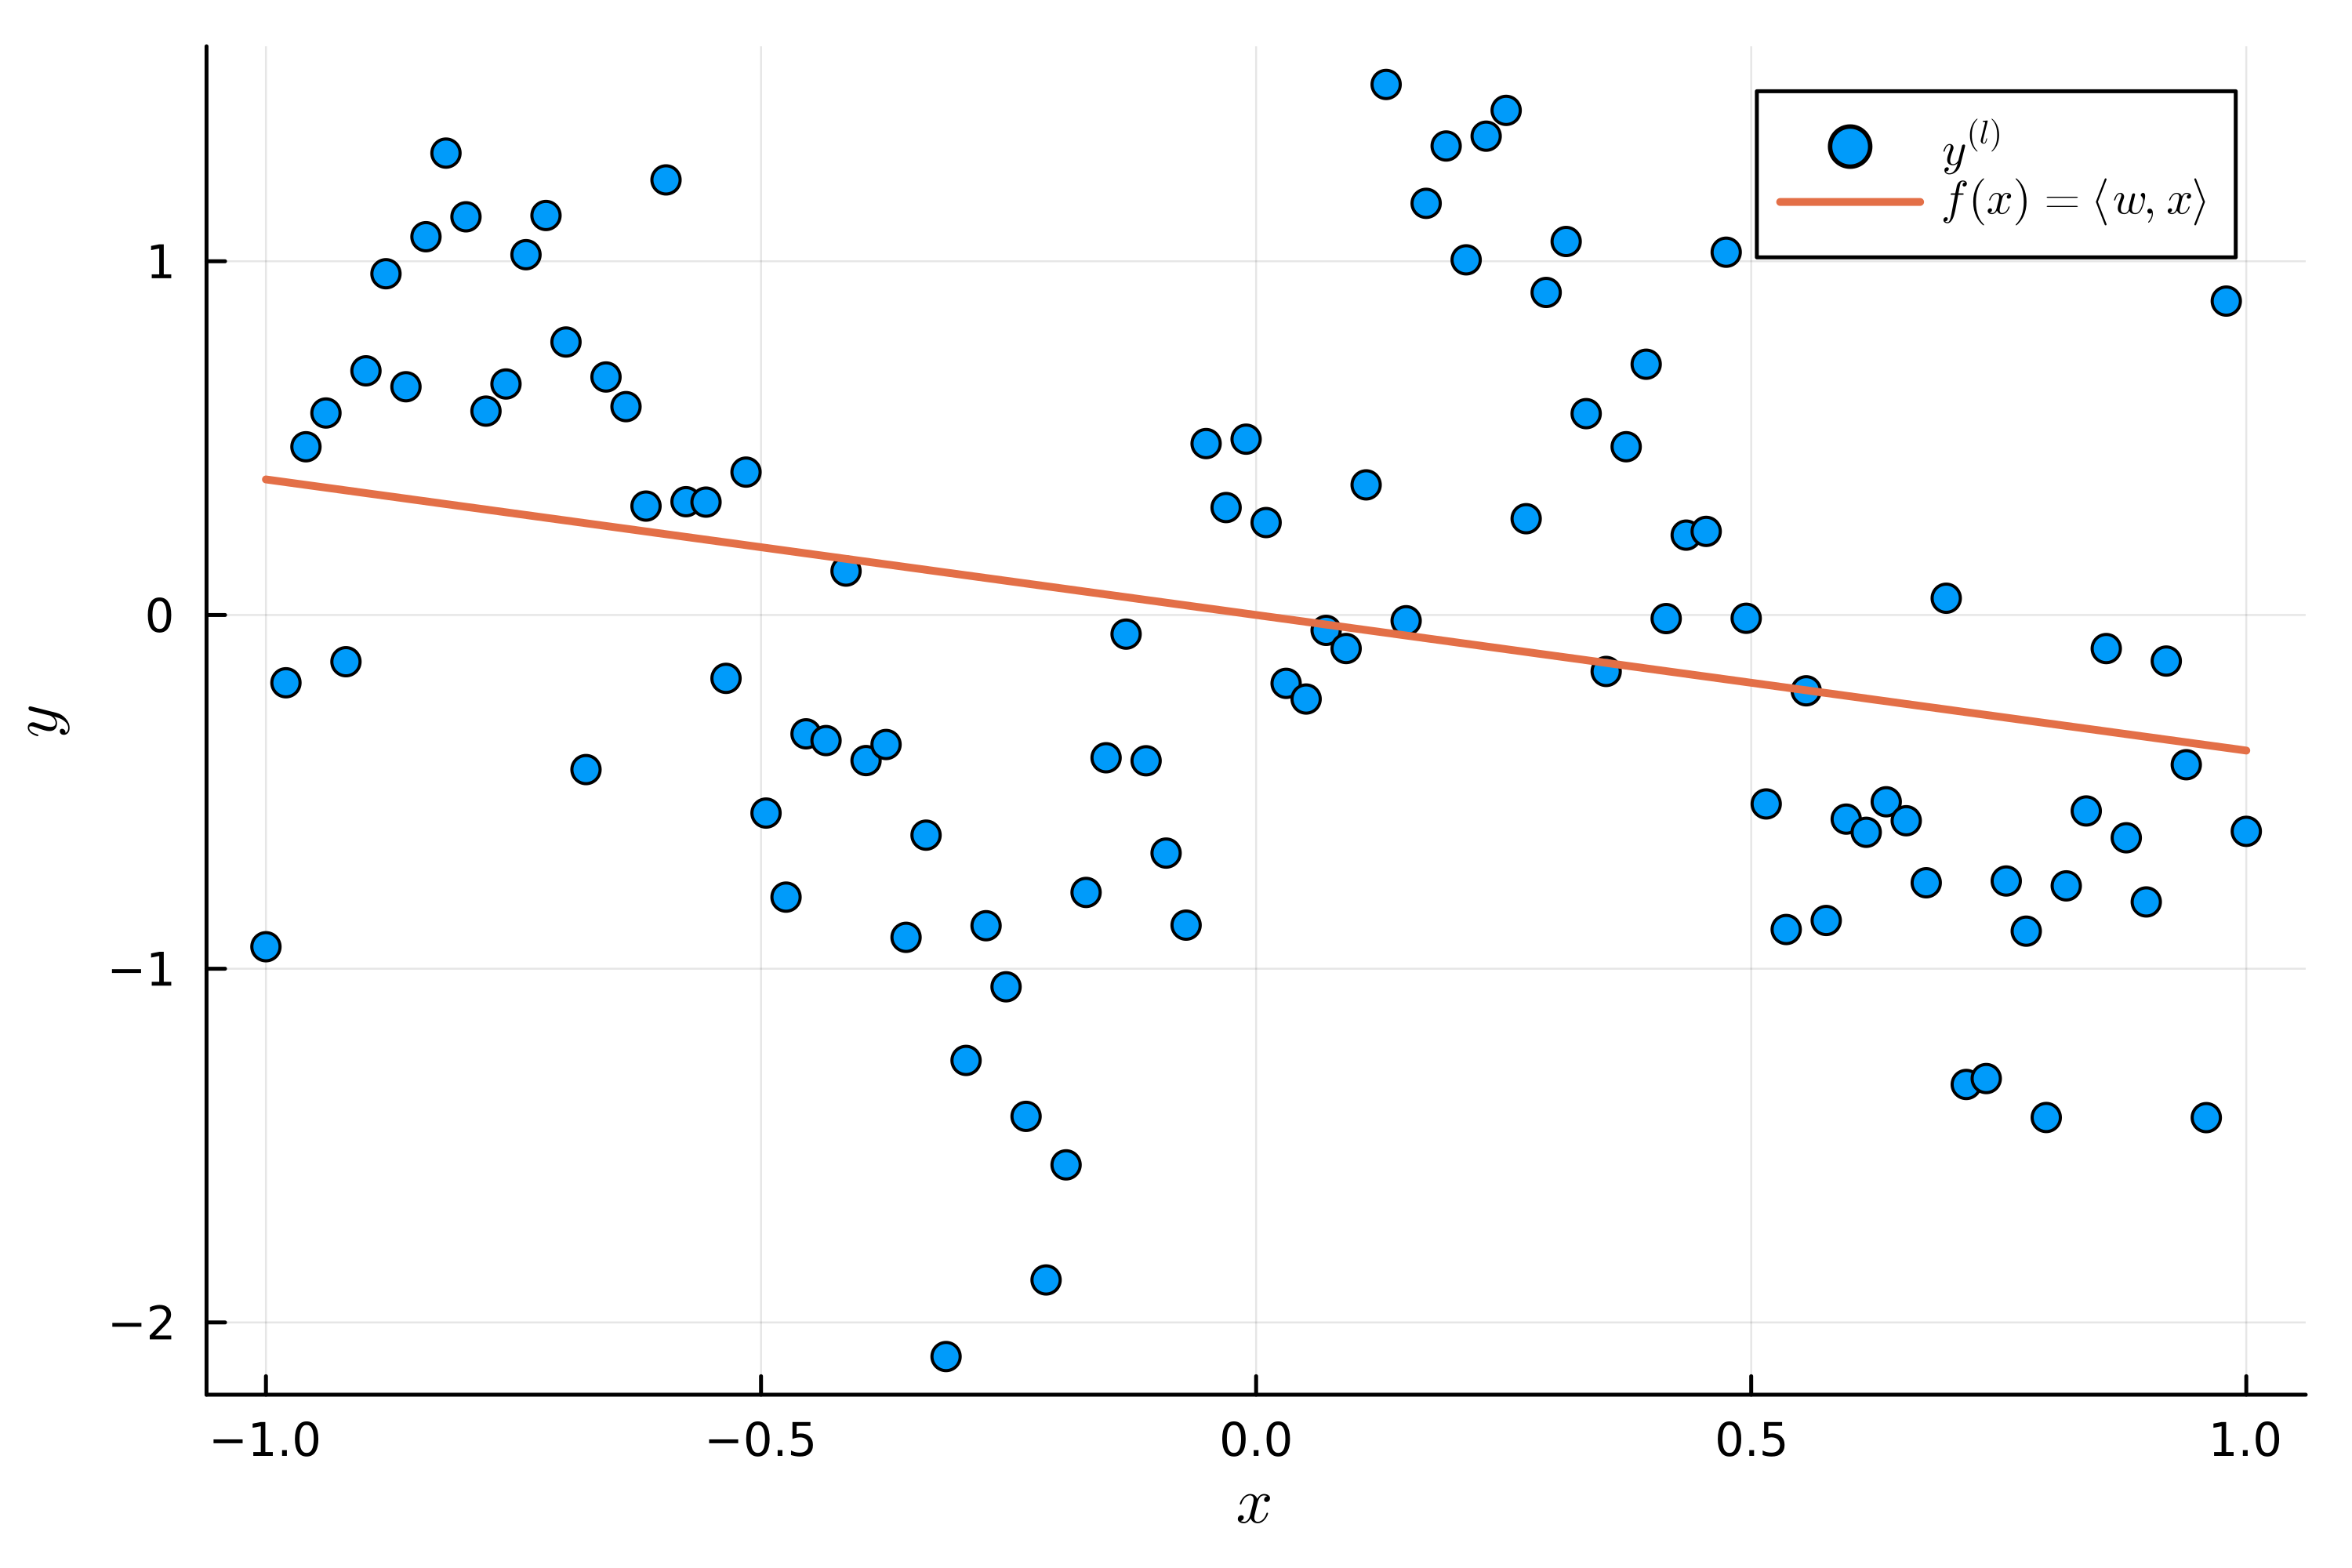

In [74]:
plot(X, Y, seriestype=:scatter, label=L"y^{(l)}", dpi=dpi);
plot!(X, w.*X, linewidth=2, label=L"f(x) = \langle w, x \rangle", legend=:topright, dpi=dpi)
xlabel!(L"x")
ylabel!(L"y")
savefig(saveTo * "/1d-linear.png")
display(Plots.current())


## Kernel Regression

In [75]:
kernel(x,y) = exponentialKernel(x, y, h=0.1);
K = gramian(kernel, collect(X));

In [76]:
w_kernel =  cg(K + λ*I,Y);
kernel_reg(x) = dot([kernel(x, u) for u in X], w_kernel)

kernel_reg (generic function with 1 method)

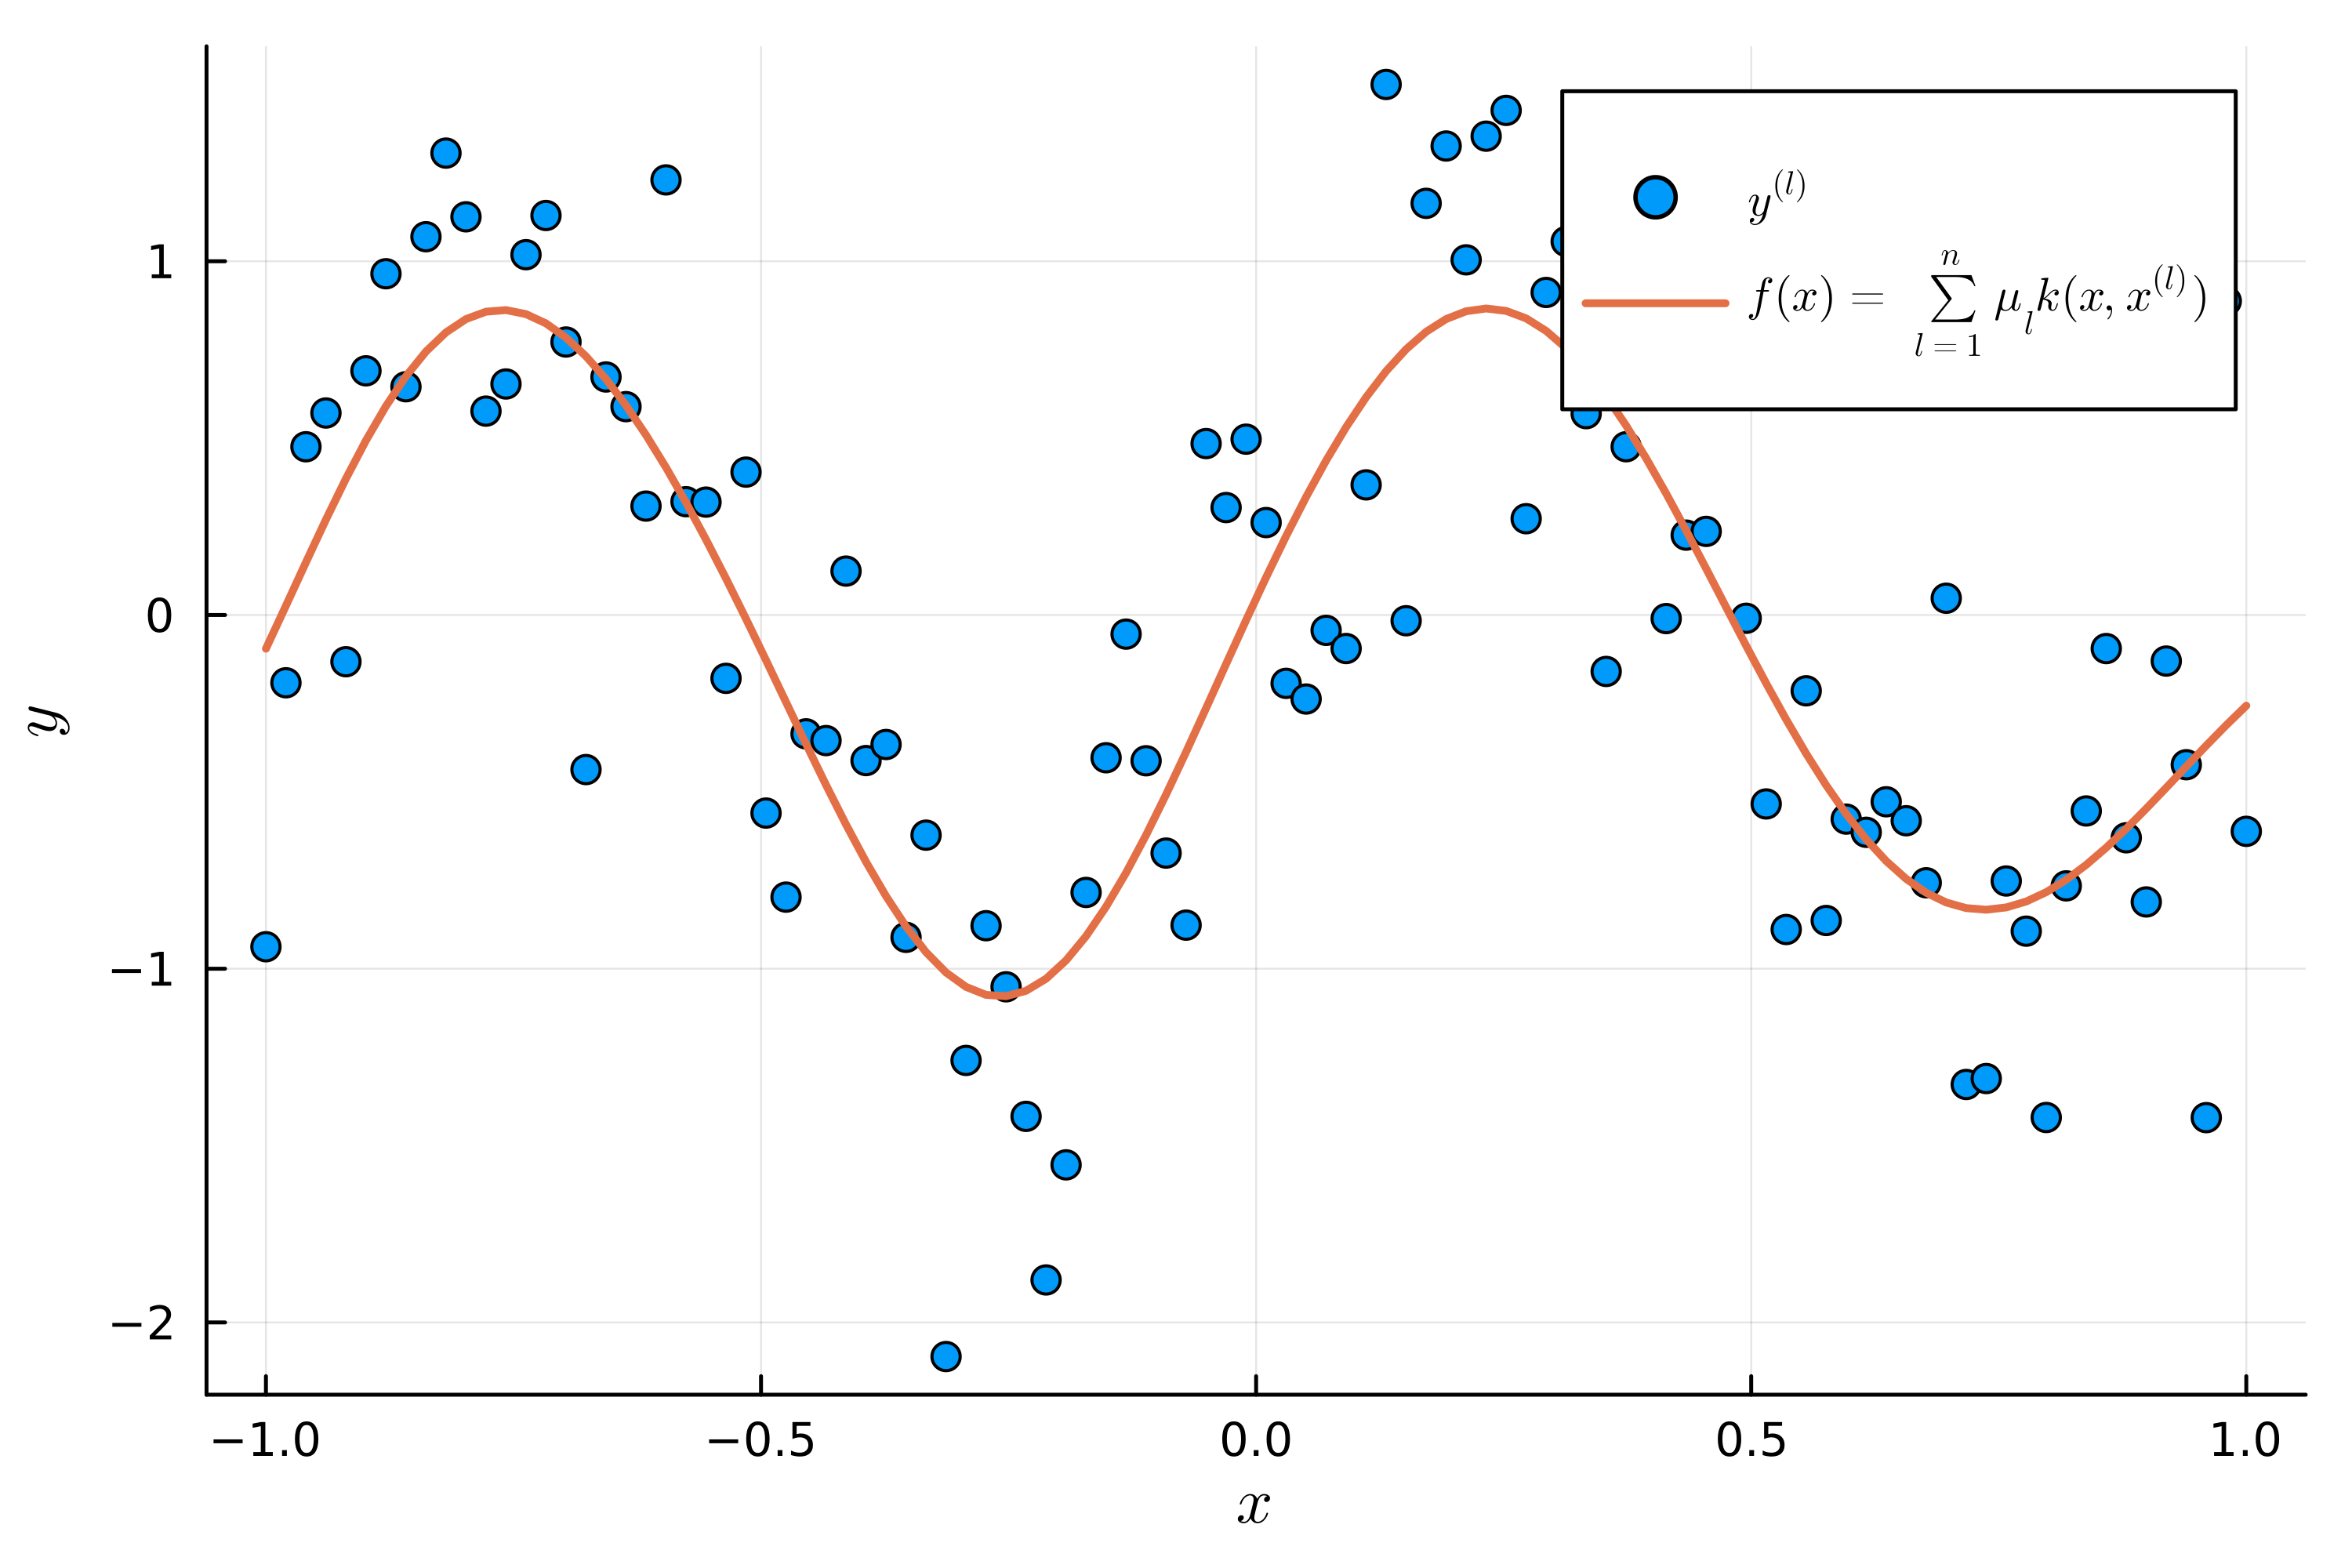

In [77]:
scatter(X, Y, label=L"y^{(l)}", dpi=dpi);
plot!(X, kernel_reg.(X), linewidth=2, label=L"f(x) = \sum_{l=1}^n \mu_l k(x,x^{(l)})", legend=:topright, dpi=dpi)
xlabel!(L"x")
ylabel!(L"y")
savefig(saveTo * "/1d-kernel.png")
display(Plots.current())

### Error Comparison

In [78]:
linear_error = norm(w.*X - truth.(X))

6.514147488885159

In [79]:
kernel_error =  norm(kernel_reg.(X) - truth.(X))

1.1405878090962125